<a href="https://colab.research.google.com/github/DavidCrespo72/AnalisisDatos/blob/main/Taller_Final_AP_Aut_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Cargamos librerías

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import pathlib as pl
from scipy.stats import shapiro
from statsmodels.stats.stattools import durbin_watson
from statsmodels.stats.diagnostic import het_breuschpagan
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (classification_report, confusion_matrix, accuracy_score,
                            precision_score, recall_score, f1_score, roc_curve, auc)


Cargamos dataset

In [4]:
df=pd.read_excel('HISTORICO_SUERTES.xlsx')

Tamaño dataset

In [5]:
df.shape

(21027, 85)

primeras filas

In [6]:
df.head()

,Período,Hacienda,Nombre,Zona,Tenencia,Suerte,Suelo,Area Neta,Dist Km,Variedad,...,Humedad Rel Media Ciclo,Oscilacion Temp Med 0-3,Oscilacion Temp Ciclo,Sum Oscilacion Temp Ciclo,Radicion Solar 0-3,Radiacion Solar Ciclo,Precipitacion 0_3,Precipitacion Ciclo,Evaporacion 0-3,Evaporacion Ciclo
0,201701,80493,LA CONCHA,IP02,51.0,002A,CANTARINA,6.00,4.3,CC85-92,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,201701,81284,UKRANIA INCAUCA,IP05,81.0,039B,NaN,1.45,NaN,CC85-92,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,201701,80203,EL AMPARO SAA,IP05,31.0,007,CORINTIAS,8.24,23.0,CC01-1228,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,201701,81380,SAN JUDAS INCAUCA,IP05,82.0,013A,NaN,1.05,66.5,CC01-1940,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,201701,80298,JAVA,IP06,31.0,025A,GALPON,4.53,17.0,RB73-2223,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Últimas filas

In [7]:
df.tail()

,Período,Hacienda,Nombre,Zona,Tenencia,Suerte,Suelo,Area Neta,Dist Km,Variedad,...,Humedad Rel Media Ciclo,Oscilacion Temp Med 0-3,Oscilacion Temp Ciclo,Sum Oscilacion Temp Ciclo,Radicion Solar 0-3,Radiacion Solar Ciclo,Precipitacion 0_3,Precipitacion Ciclo,Evaporacion 0-3,Evaporacion Ciclo
21022,202407,80102,LA PAZ,IP01,11.0,051B,LA PAZ,3.00,1.8,CC05-430,...,78.797,16.4,31.089,NaN,467.043,444.382,177.3,1037.8,542.2,1824.6
21023,202407,80102,LA PAZ,IP01,11.0,054C,LA PAZ,1.22,1.8,CC05-430,...,78.704,17.8,30.945,NaN,461.663,444.528,168.7,1041.6,536.4,1867.2
21024,202407,80102,LA PAZ,IP01,11.0,054E,LA PAZ,1.85,1.8,CC05-430,...,78.704,17.8,30.945,NaN,461.663,444.528,168.7,1041.6,536.4,1867.2
21025,202407,80104,SAMARIA,IP02,11.0,165,PALMIRA,31.42,3.5,CC05-430,...,78.720,17.8,31.040,NaN,467.911,444.839,177.3,1037.8,544.2,1843.9
21026,202407,80124,SANTA LUCIA,IP02,11.0,001,CORINTIAS,2.22,1.1,CC05-430,...,78.687,17.8,30.890,NaN,459.274,444.372,119.8,1041.6,532.5,1881.2


Descripción general de columnas

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21027 entries, 0 to 21026
Data columns (total 85 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Período                    21027 non-null  int64         
 1   Hacienda                   21027 non-null  int64         
 2   Nombre                     21027 non-null  object        
 3   Zona                       21027 non-null  object        
 4   Tenencia                   21026 non-null  float64       
 5   Suerte                     21027 non-null  object        
 6   Suelo                      17269 non-null  object        
 7   Area Neta                  21027 non-null  float64       
 8   Dist Km                    21022 non-null  float64       
 9   Variedad                   21027 non-null  object        
 10  Cod.Estado #               21027 non-null  int64         
 11  Cod.Estado                 21027 non-null  object        
 12  F.Si

Descripción detallada de columnas del dataset

In [9]:
df.describe()

,Período,Hacienda,Tenencia,Area Neta,Dist Km,Cod.Estado #,F.Siembra,Ult.Riego,Edad Ult Cos,F.Ult.Corte,...,Humedad Rel Media Ciclo,Oscilacion Temp Med 0-3,Oscilacion Temp Ciclo,Sum Oscilacion Temp Ciclo,Radicion Solar 0-3,Radiacion Solar Ciclo,Precipitacion 0_3,Precipitacion Ciclo,Evaporacion 0-3,Evaporacion Ciclo
count,21027.000000,21027.000000,21026.000000,21027.000000,21022.000000,21027.000000,21027,8470,21027.00000,21027,...,4530.000000,4530.000000,4530.000000,0.0,4530.000000,4530.000000,4530.000000,4530.000000,4530.000000,4530.000000
mean,202039.708708,80679.334427,46.448730,8.642948,25.311806,4.261806,2015-03-11 18:18:44.839492096,2020-02-16 21:24:26.351829760,13.01111,2020-10-27 09:01:09.339420672,...,80.764679,16.059757,24.556072,NaN,435.119397,438.344500,298.258587,1209.462980,442.941369,1912.479868
min,201701.000000,80100.000000,11.000000,0.004000,1.100000,0.000000,1986-04-30 00:00:00,2016-01-12 00:00:00,1.31000,2017-01-02 00:00:00,...,63.327000,12.500000,22.353000,NaN,352.013000,367.315000,23.100000,23.100000,190.400000,190.400000
25%,201812.000000,80247.000000,31.000000,3.310000,12.000000,1.000000,2013-03-13 00:00:00,2018-03-07 00:00:00,11.93000,2018-12-14 00:00:00,...,80.038000,15.200000,22.946250,NaN,421.344750,426.533250,221.650000,998.900000,416.800000,1729.900000
50%,202010.000000,80453.000000,51.000000,7.000000,21.900000,3.000000,2015-11-10 00:00:00,2019-08-14 00:00:00,12.62000,2020-10-11 00:00:00,...,81.291500,15.700000,23.201500,NaN,436.591000,439.140000,296.900000,1181.150000,440.950000,1885.200000
75%,202209.000000,81104.000000,51.000000,12.075000,32.700000,6.000000,2018-08-07 00:00:00,2022-05-19 00:00:00,13.86000,2022-09-25 00:00:00,...,82.440500,16.800000,25.660000,NaN,449.274000,450.391000,373.300000,1391.850000,465.800000,2057.800000
max,202407.000000,82557.000000,91.000000,65.000000,155.000000,31.000000,2023-09-08 00:00:00,2024-06-27 00:00:00,78.19000,2024-07-10 00:00:00,...,84.816000,19.700000,32.358000,NaN,500.212000,485.672000,618.000000,3783.700000,614.300000,4971.800000
std,216.642895,590.030150,21.513498,7.049533,18.237344,4.111935,NaN,NaN,1.97907,NaN,...,2.752029,1.300131,2.471964,NaN,21.307392,18.582606,102.901635,340.463189,43.680452,307.978328


Revisamos Nulos

In [10]:
df.isnull().sum()

,0
Período,0
Hacienda,0
Nombre,0
Zona,0
Tenencia,1
...,...
Radiacion Solar Ciclo,16497
Precipitacion 0_3,16497
Precipitacion Ciclo,16497
Evaporacion 0-3,16497


% Part. nullos

In [11]:
df.isnull().mean()*100

,0
Período,0.000000
Hacienda,0.000000
Nombre,0.000000
Zona,0.000000
Tenencia,0.004756
...,...
Radiacion Solar Ciclo,78.456271
Precipitacion 0_3,78.456271
Precipitacion Ciclo,78.456271
Evaporacion 0-3,78.456271


Revisar duplicados

In [12]:
df.duplicated().sum()

np.int64(0)

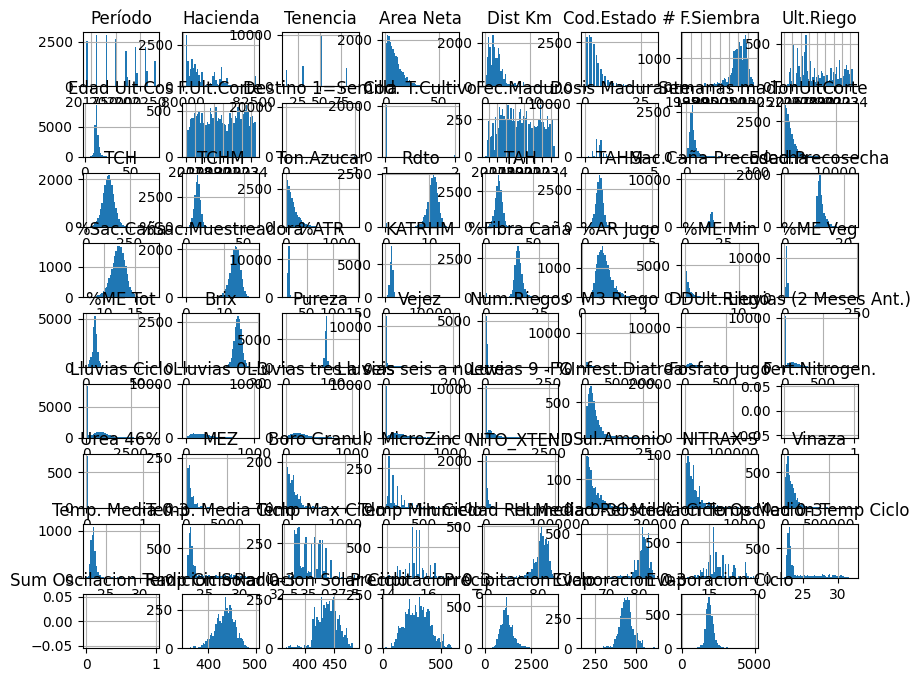

In [13]:
## Ver si lo quitamos

df.hist(bins=50,figsize=(10,8))
plt.show()

Conteo columba categórica

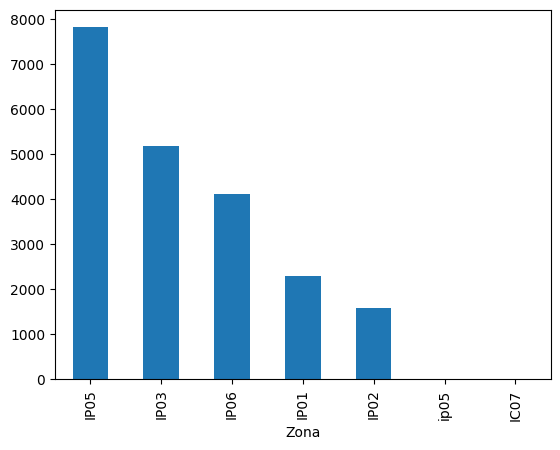

In [14]:
df['Zona'].value_counts().plot(kind='bar')
plt.show()

Separar columnas númericas para correr correlaciones

In [15]:
df_numericas = df.select_dtypes(include=[np.number])
df_numericas.head()

,Período,Hacienda,Tenencia,Area Neta,Dist Km,Cod.Estado #,Edad Ult Cos,Destino 1=Semilla,Cod. T.Cultivo,Dosis Madurante,...,Humedad Rel Media Ciclo,Oscilacion Temp Med 0-3,Oscilacion Temp Ciclo,Sum Oscilacion Temp Ciclo,Radicion Solar 0-3,Radiacion Solar Ciclo,Precipitacion 0_3,Precipitacion Ciclo,Evaporacion 0-3,Evaporacion Ciclo
0,201701,80493,51.0,6.00,4.3,5,12.81,0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,201701,81284,81.0,1.45,NaN,5,11.14,0,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,201701,80203,31.0,8.24,23.0,4,12.32,0,1.0,1.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,201701,81380,82.0,1.05,66.5,2,9.79,0,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,201701,80298,31.0,4.53,17.0,3,11.53,0,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Correlaciones

In [18]:
### Ver si lo quitamos

corr=df_numericas.corr().sort_values('TCH', ascending=False)
print (corr)

                            Período  Hacienda  Tenencia  Area Neta   Dist Km  \
TCH                       -0.122134 -0.051714 -0.021055   0.093021 -0.048510   
TAH                       -0.148777 -0.011808  0.024973   0.140966 -0.013920   
TCHM                      -0.054296 -0.072896 -0.069913   0.087121 -0.079327   
KATRHM                    -0.096214 -0.054111 -0.040488   0.121152 -0.056160   
TAHM                      -0.093161 -0.020695  0.004759   0.151875 -0.030986   
...                             ...       ...       ...        ...       ...   
%ATR                      -0.099064  0.038233  0.053667   0.067557  0.043439   
%Sac.Caña                 -0.120753  0.050982  0.038158   0.113064  0.048021   
Cod.Estado #              -0.000865  0.065617  0.193415   0.035206 -0.007177   
Fert.Nitrogen.                  NaN       NaN       NaN        NaN       NaN   
Sum Oscilacion Temp Ciclo       NaN       NaN       NaN        NaN       NaN   

                           Cod.Estado #

In [22]:
## ver si lo quitamos

# Aplanar matriz y ordenar
corr_ord = corr.unstack().sort_values(ascending=False)

# Quitar la diagonal (correlación = 1.0) y duplicados
corr_filtrada = corr_ord[corr_ord < 1].drop_duplicates()

# Mostrar las 20 más fuertes
print(corr_filtrada.head(20))

Ton.Azucar            TonUltCorte              0.987930
Brix                  Pureza                   0.978632
%Sac.Caña             Rdto                     0.970430
Evaporacion Ciclo     Edad.Precosecha          0.968729
%Sac.Muestreadora     Brix                     0.957215
Area Neta             TonUltCorte              0.948529
Ton.Azucar            Area Neta                0.947346
TAHM                  KATRHM                   0.942482
TCHM                  KATRHM                   0.898913
TAH                   TAHM                     0.881677
                      TCH                      0.866165
Rdto                  %Sac.Muestreadora        0.857887
Luvias 9 -FC          Lluvias Ciclo            0.851217
Lluvias seis a nueve  Lluvias Ciclo            0.847246
Pureza                %Sac.Muestreadora        0.831700
Evaporacion Ciclo     Edad Ult Cos             0.830807
TCHM                  TCH                      0.829980
Lluvias tres a seis   Lluvias Ciclo            0

In [24]:
# Calcular correlaciones con churn y ordenarlas
df_numericas = df.corr(numeric_only=True)['TCH'].sort_values(ascending=False)

# Mostrar resultado
print(df_numericas)

TCH                          1.000000
TAH                          0.866165
TCHM                         0.829980
KATRHM                       0.767925
TAHM                         0.737953
                               ...   
%ATR                        -0.138399
%Sac.Caña                   -0.168060
Cod.Estado #                -0.225865
Fert.Nitrogen.                    NaN
Sum Oscilacion Temp Ciclo         NaN
Name: TCH, Length: 67, dtype: float64


In [25]:
corr_df = df_numericas.reset_index()
corr_df.columns = ['Variable', 'Correlacion_con_TCH']
corr_df

,Variable,Correlacion_con_TCH
0,TCH,1.000000
1,TAH,0.866165
2,TCHM,0.829980
3,KATRHM,0.767925
4,TAHM,0.737953
...,...,...
62,%ATR,-0.138399
63,%Sac.Caña,-0.168060
64,Cod.Estado #,-0.225865
65,Fert.Nitrogen.,NaN


In [27]:
print(df_numericas.head(20))

TCH                      1.000000
TAH                      0.866165
TCHM                     0.829980
KATRHM                   0.767925
TAHM                     0.737953
TonUltCorte              0.320696
Edad Ult Cos             0.298166
Ton.Azucar               0.295671
Evaporacion Ciclo        0.260934
Evaporacion 0-3          0.185401
Edad.Precosecha          0.168624
Radicion Solar 0-3       0.164893
Luvias 9 -FC             0.156767
Radiacion Solar Ciclo    0.113209
%Infest.Diatrea          0.102551
DDUlt.Riego              0.093181
Area Neta                0.093021
M3 Riego                 0.084436
Lluvias Ciclo            0.084137
MEZ                      0.078172
Name: TCH, dtype: float64


Separar de mi dataset mis variables de interés para medición de TCH

In [35]:
df_i=df[['TCH','TAH','TCHM','KATRHM','TAHM','TonUltCorte','Edad Ult Cos','Ton.Azucar','Evaporacion Ciclo','Evaporacion 0-3','Edad.Precosecha','Radicion Solar 0-3','Luvias 9 -FC']]
df_i.head()

,TCH,TAH,TCHM,KATRHM,TAHM,TonUltCorte,Edad Ult Cos,Ton.Azucar,Evaporacion Ciclo,Evaporacion 0-3,Edad.Precosecha,Radicion Solar 0-3,Luvias 9 -FC
0,121.198333,14.341666,9.461228,1434.823641,1.119567,727.19,12.81,86.050,NaN,NaN,NaN,NaN,482.0
1,93.793103,10.157241,8.419488,1182.180399,0.911781,136.00,11.14,14.728,NaN,NaN,NaN,NaN,0.0
2,174.347087,17.629611,14.151549,1857.192723,1.430974,1436.62,12.32,145.268,NaN,NaN,12.02,NaN,457.0
3,136.790476,12.873333,13.972469,1744.043640,1.314947,143.63,9.79,13.517,NaN,NaN,NaN,NaN,0.0
4,113.068432,9.383002,9.806455,1137.843039,0.813790,512.20,11.53,42.505,NaN,NaN,NaN,NaN,284.0


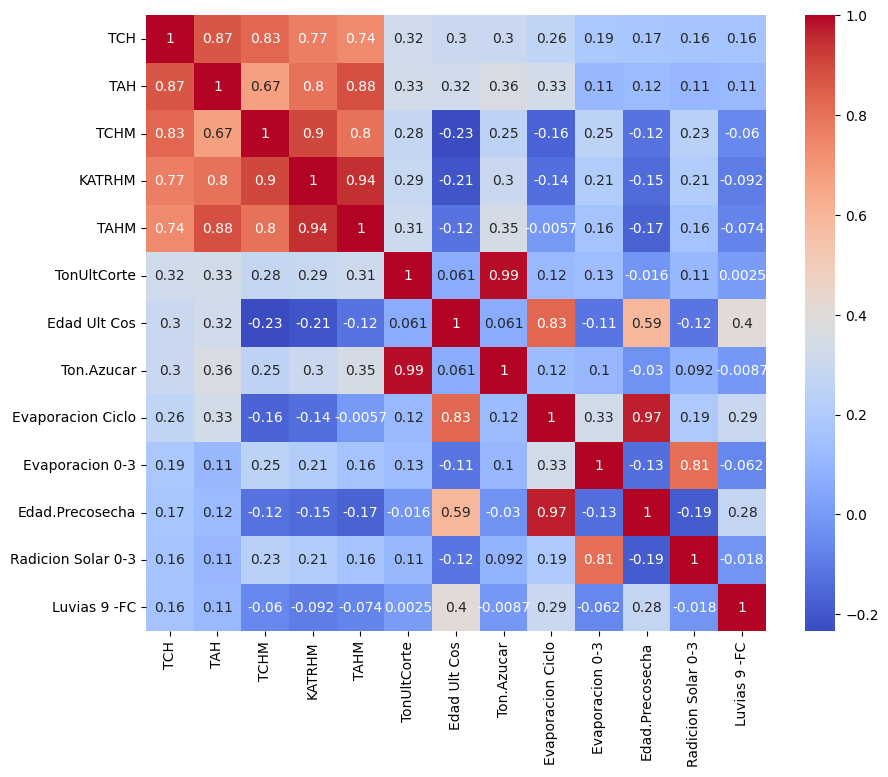

In [36]:
plt.figure(figsize=(10, 8))
sns.heatmap(df_i.corr(), annot=True, cmap='coolwarm')
plt.show()

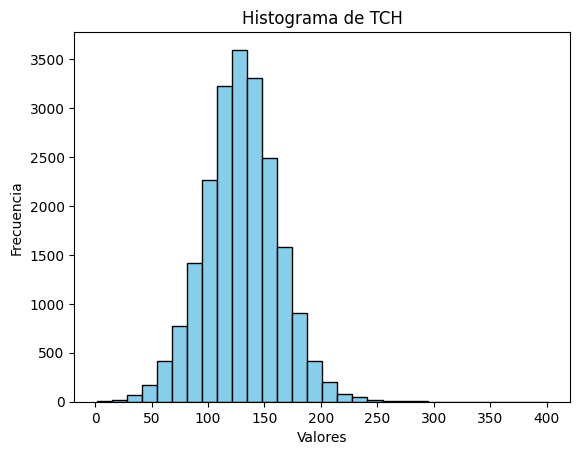

In [30]:
plt.hist(df['TCH'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Valores')
plt.ylabel('Frecuencia')
plt.title('Histograma de TCH')


plt.show()

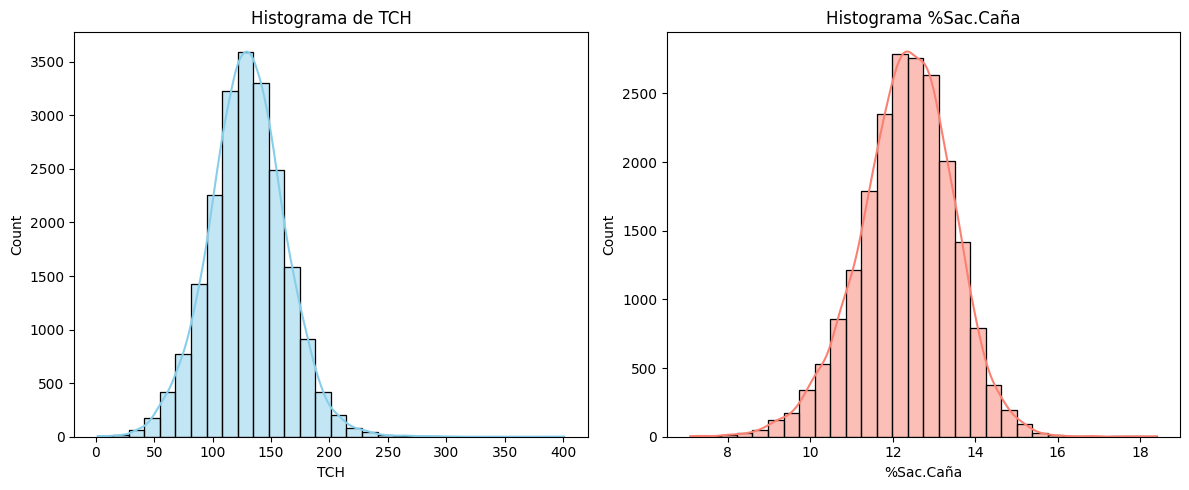

In [31]:
# Crear lienzo con 2 subplots (1 fila, 2 columnas)
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Histograma 1
sns.histplot(df['TCH'], bins=30, kde=True, color='skyblue', ax=axes[0])
axes[0].set_title('Histograma de TCH')

# Histograma 2
sns.histplot(df['%Sac.Caña'], bins=30, kde=True, color='salmon', ax=axes[1])
axes[1].set_title('Histograma %Sac.Caña')

plt.tight_layout()
plt.show()

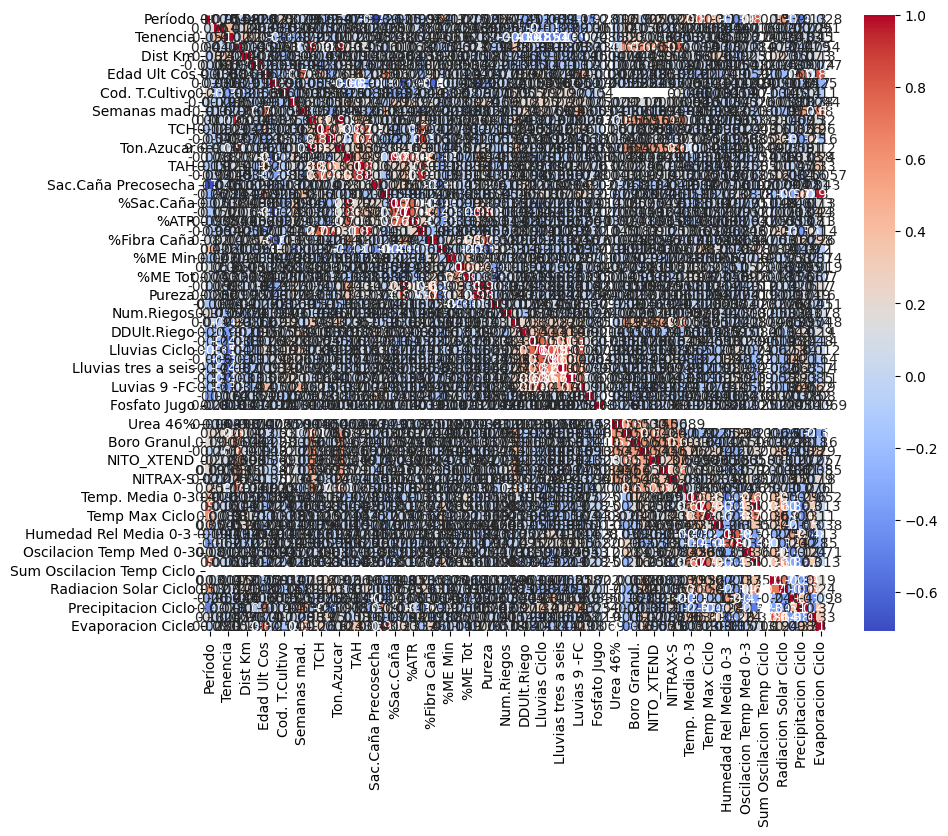

In [17]:
plt.figure(figsize=(10, 8))
sns.heatmap(df_numericas.corr(), annot=True, cmap='coolwarm')
plt.show()

Dispersión

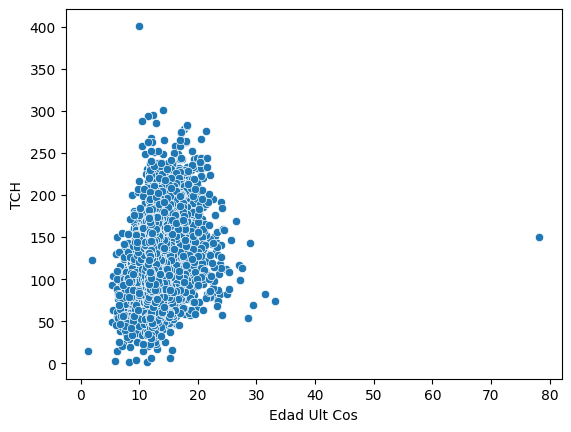

In [30]:
sns.scatterplot(data=df, x='Edad Ult Cos', y='TCH')
plt.show()

Outliers

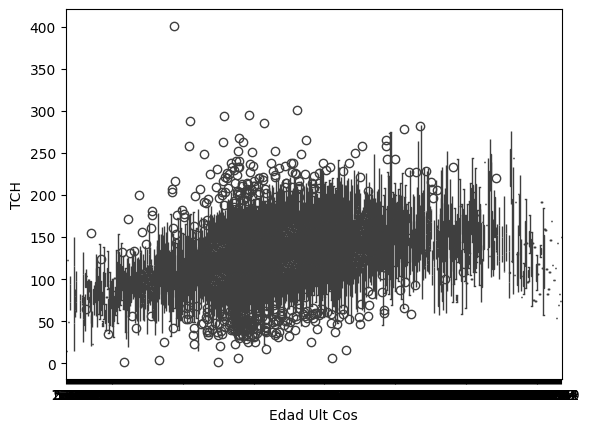

In [31]:
sns.boxplot(data=df, x='Edad Ult Cos', y='TCH')
plt.show()

In [35]:
!pip install ydata-profiling



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.1/400.1 kB 10.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 19.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.3/37.3 MB 15.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 kB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.3/43.3 kB 3.1 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.16.1
    Uninstalling scipy-1.16.1:
      Successfully uninstalled scipy-1.16.1
  Attempting uninstall: multimethod
    Found existing installation: multimethod 2.0
    Uninstalling multimethod-2.0:
      Successfully uninstalled multimethod-2.0
  Attempting uninstall: imagehash
    Found existing installation: ImageHash 4.3.2
    Uninstalling ImageHash-4.3.2:
      Successfully uninstalled ImageHash-4.3.2
  Attempting uninstall: visions
    Foun

In [34]:
from ydata_profiling import ProfileReport
profile = ProfileReport(df, explorative=True)
profile.to_notebook_iframe()

AttributeError: module 'numba' has no attribute 'generated_jit'